In [1]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, MinuteLocator, SecondLocator
import numpy as np
# from StringIO import StringIO
import datetime as dt
import yaml, glob

In [4]:

def parse_ivals(bench: str):
    files = glob.glob(f'/home/wenyuz/MMTk-Dev/evaluation/results/log/ix-worker-yield-boar-2024-03-02-Sat-051554/{bench}.*.log')
    if len(files) == 0: return None
    with open(files[0], 'r') as f:
        yaml_src, recording, parsing_finished = "", False, False
        for line in f:
            if line.startswith('===== GC Intervals Start ====='):
                recording = True
            elif line.startswith('===== GC Intervals End ====='):
                recording = False
                parsing_finished = True
            elif recording:
                yaml_src += line
        return yaml.safe_load(yaml_src) if parsing_finished else None

def calculate_work_ivals(stw_ivals, yield_ivals):
    work_ivals = []
    last_end_time = 0
    for ivals in yield_ivals:
        if last_end_time is not None:
            start, end = last_end_time, ivals[0]
            overlap_with_stw = False
            for stw_ival in stw_ivals:
                if (stw_ival[0] < start and start < stw_ival[1]) or (stw_ival[0] < end and end < stw_ival[1]):
                    overlap_with_stw = True
                    break
            if overlap_with_stw:
                work_ivals.append((start, end))
        last_end_time = ivals[1]
    starts = [float(x[0]) / 1000.0 for x in work_ivals]
    stops = [float(x[1]) / 1000.0 for x in work_ivals]
    return starts, stops

def plot_timeline(bench: str, pauses=2, skip=2):
    data = parse_ivals(bench)
    if data is None: return
    if len(data['stw-tracing']) <= 0: return
    plt.figure(figsize=(20,6))
    stw = data['stw-tracing']
    stw = stw[skip : skip+pauses]
    data['stw-tracing'] = stw
    n = len(data['yield'])
    # plot work ivals
    for i in range(n):
        starts, stops = calculate_work_ivals(data['stw-tracing'], data['yield'][i])
        y = np.ones(len(starts)) * i
        # timelines(y, starts, stops, 'k')
        plt.hlines(y, starts, stops, 'k', lw=4)
    # plot stw phases
    for [start, stop] in data['stw-tracing']:
        plt.vlines([start/1000.0], [-0.5], [n+0.5], 'r', lw=1)
        plt.vlines([stop/1000.0], [-0.5], [n+0.5], 'b', lw=1)

Immix, 3x heap

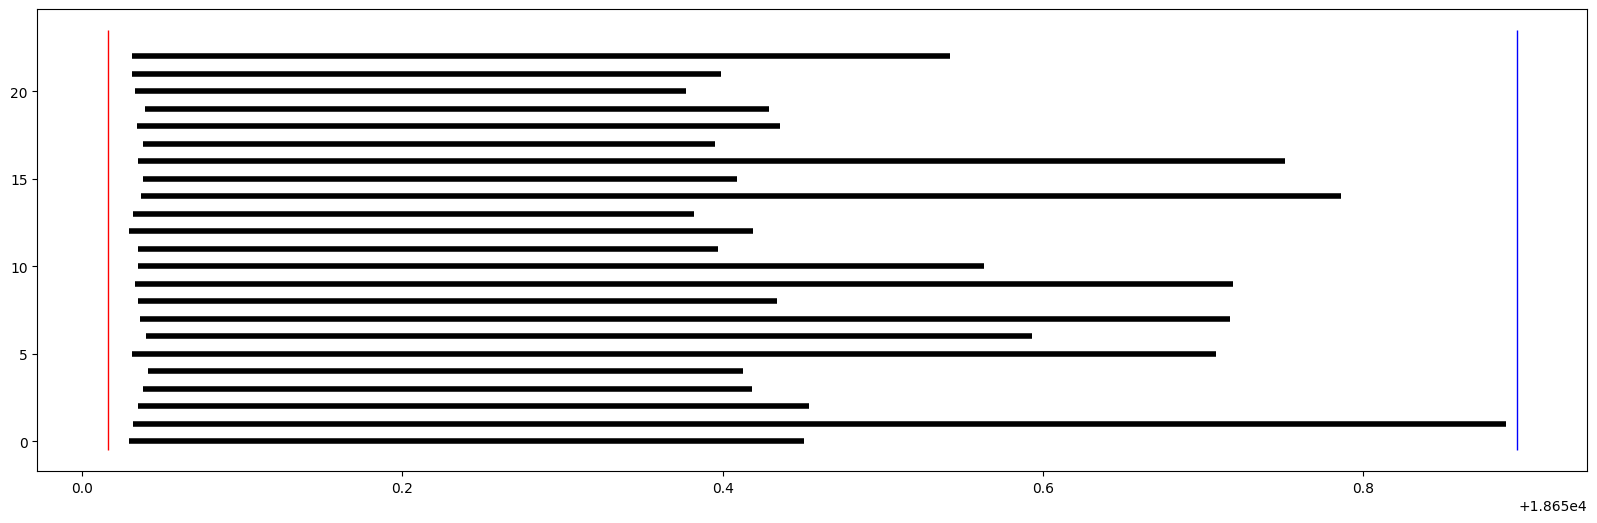

In [34]:
plot_timeline("lusearch", pauses=1, skip=2)

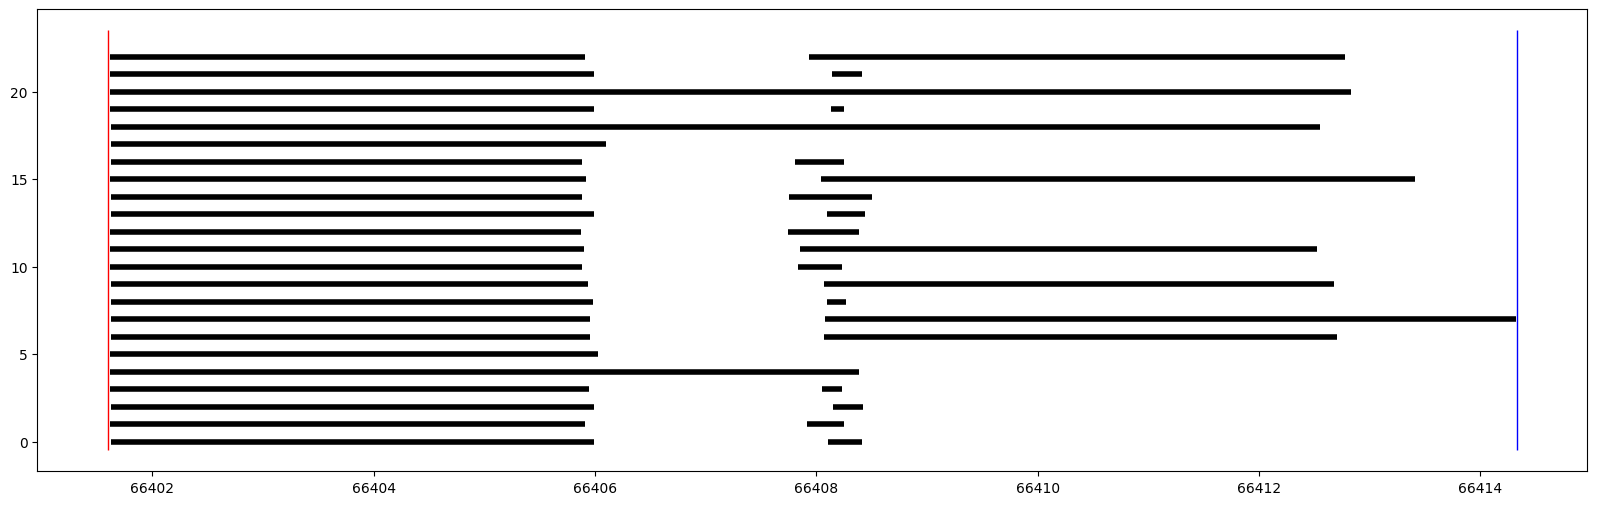

In [14]:
plot_timeline("cassandra", pauses=1, skip=2)

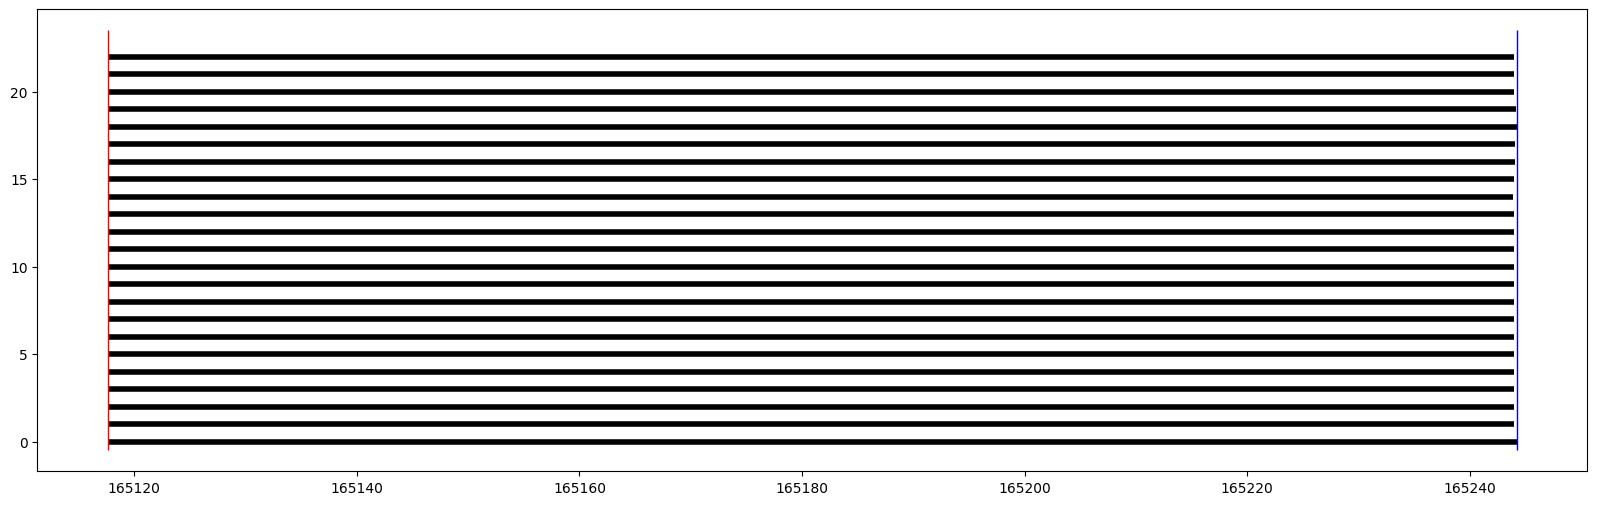

In [18]:
plot_timeline("h2", pauses=1, skip=2)

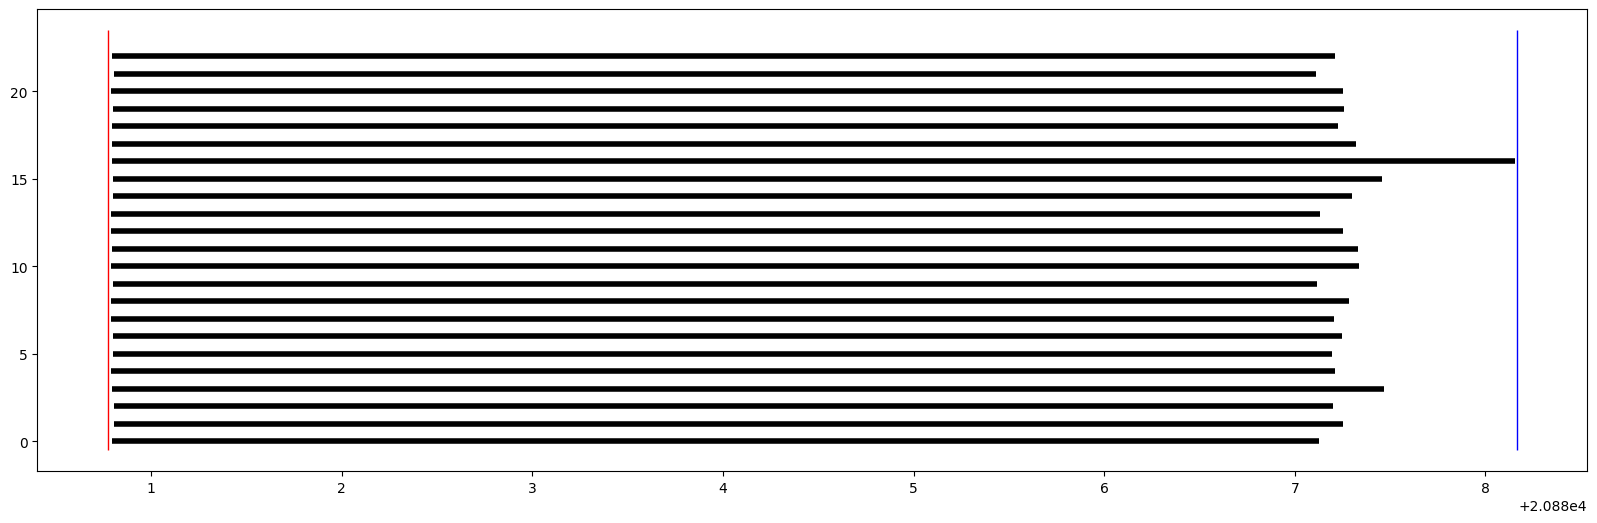

In [20]:
plot_timeline("spring", pauses=1, skip=2)

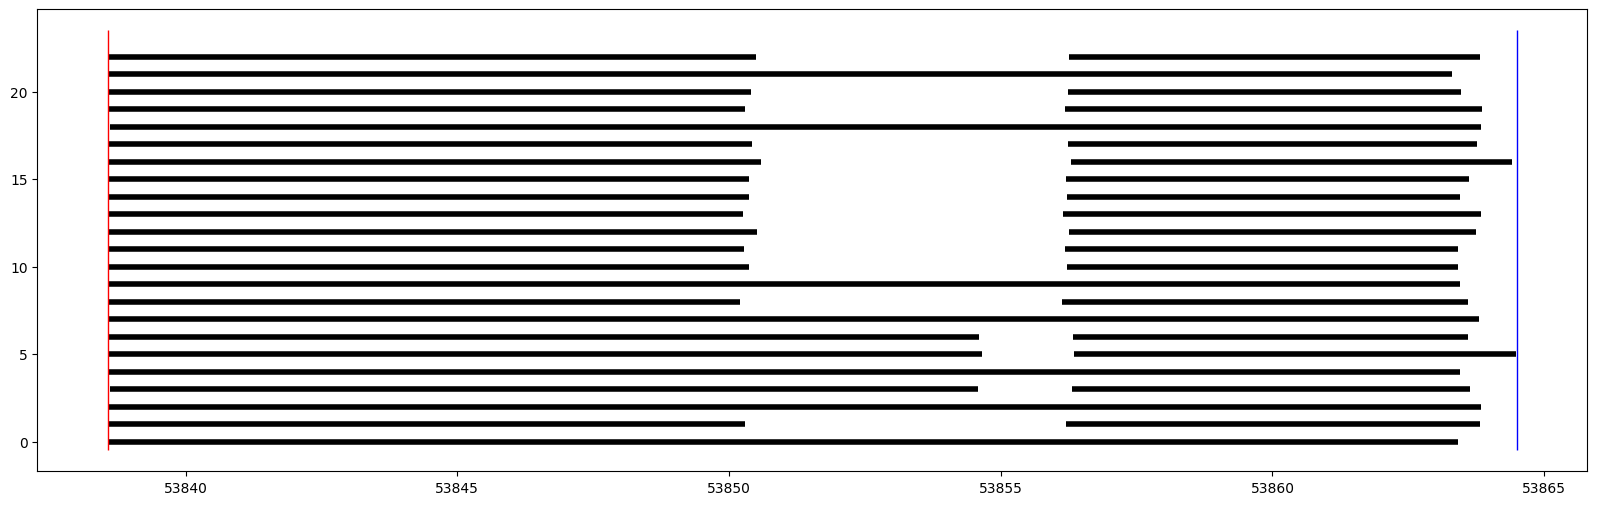

In [21]:
plot_timeline("tradebeans", pauses=1, skip=2)

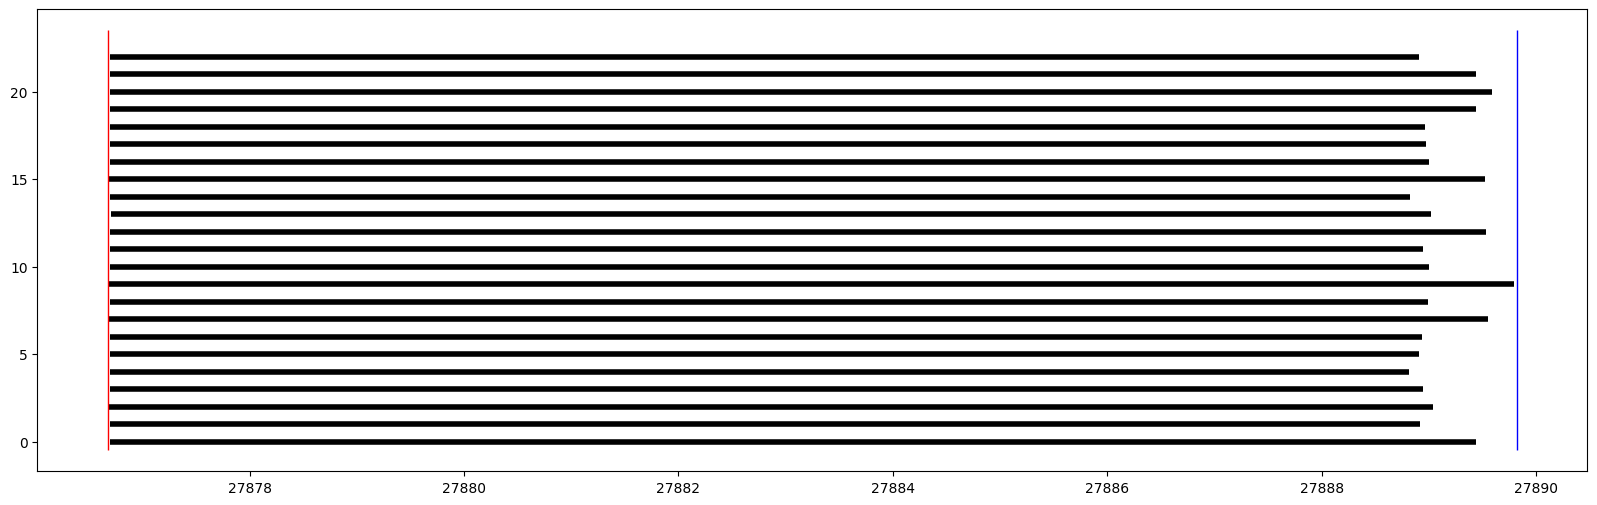

In [22]:
plot_timeline("tradesoap", pauses=1, skip=2)

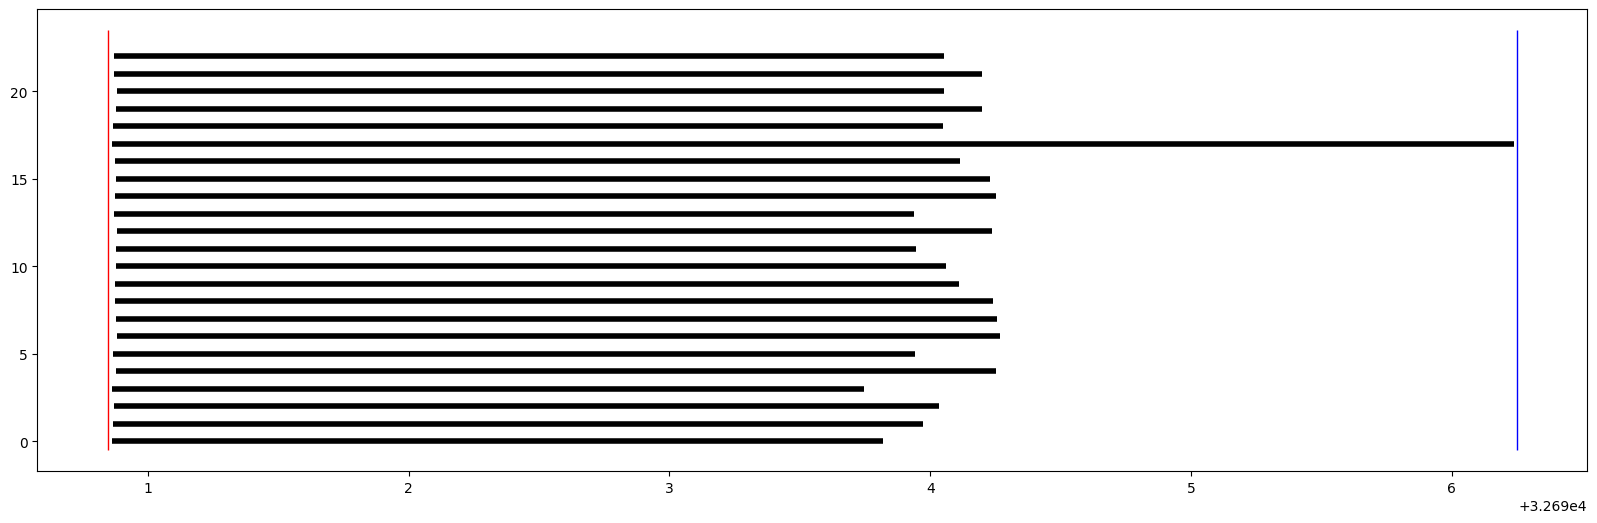

In [29]:
plot_timeline("kafka", pauses=1, skip=2)

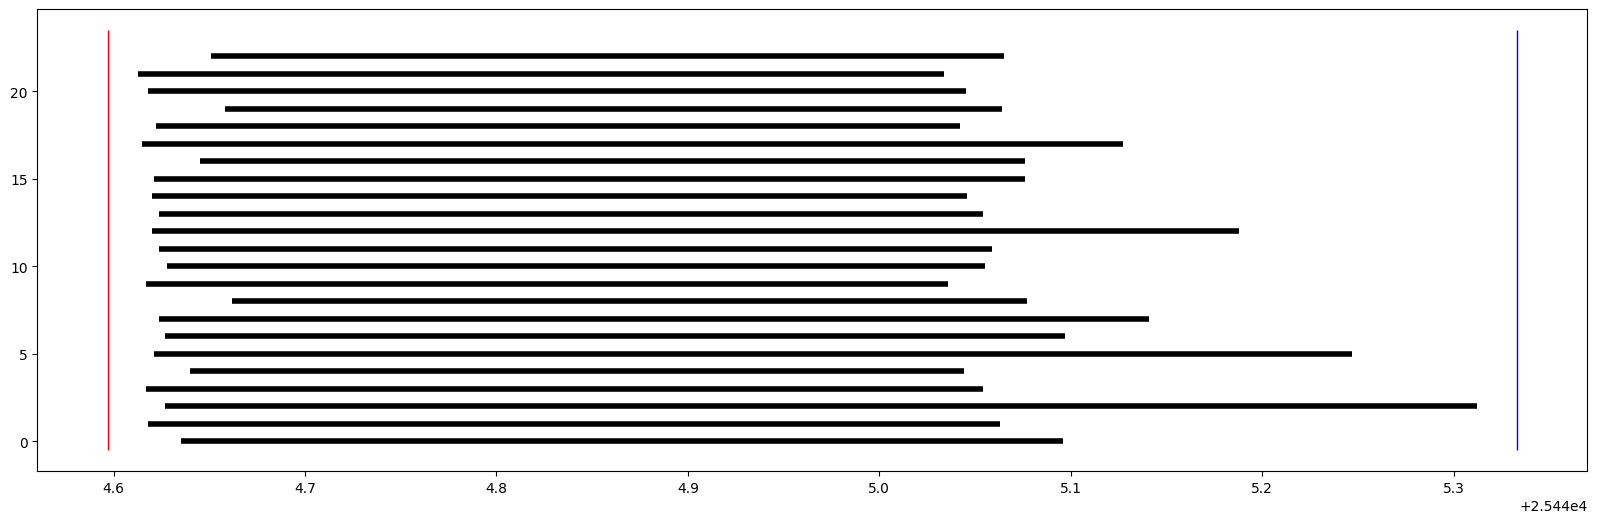

In [23]:
plot_timeline("avrora", pauses=1, skip=2)

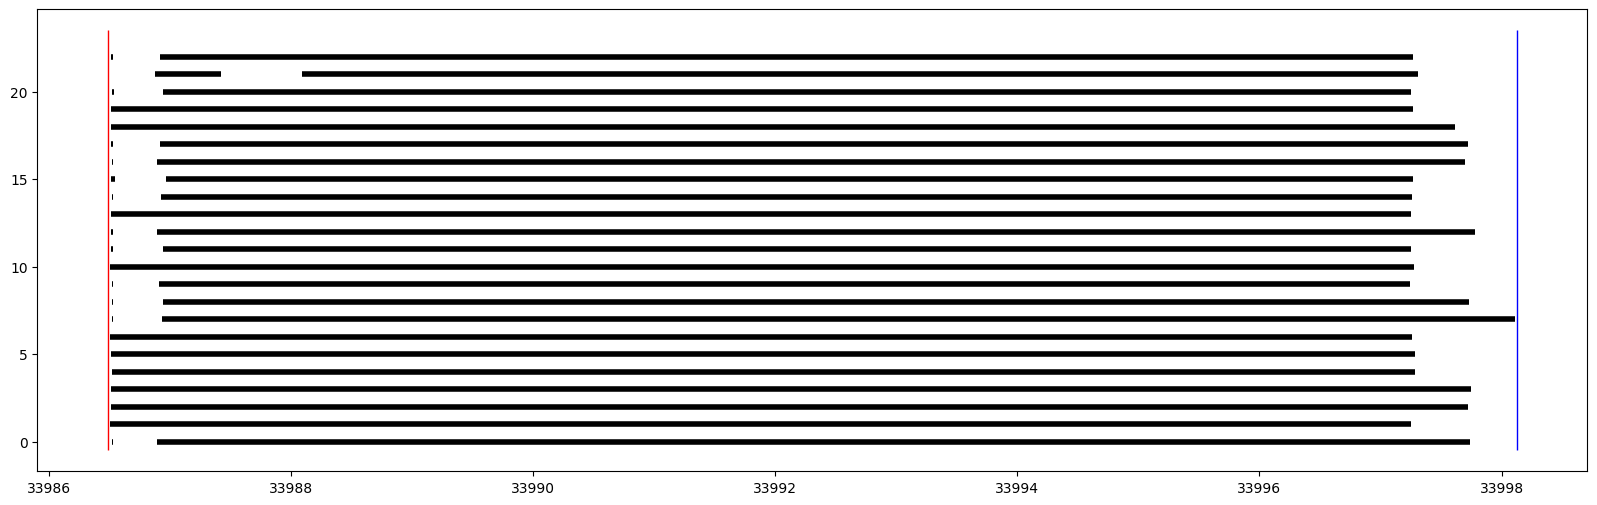

In [24]:
plot_timeline("biojava", pauses=1, skip=2)

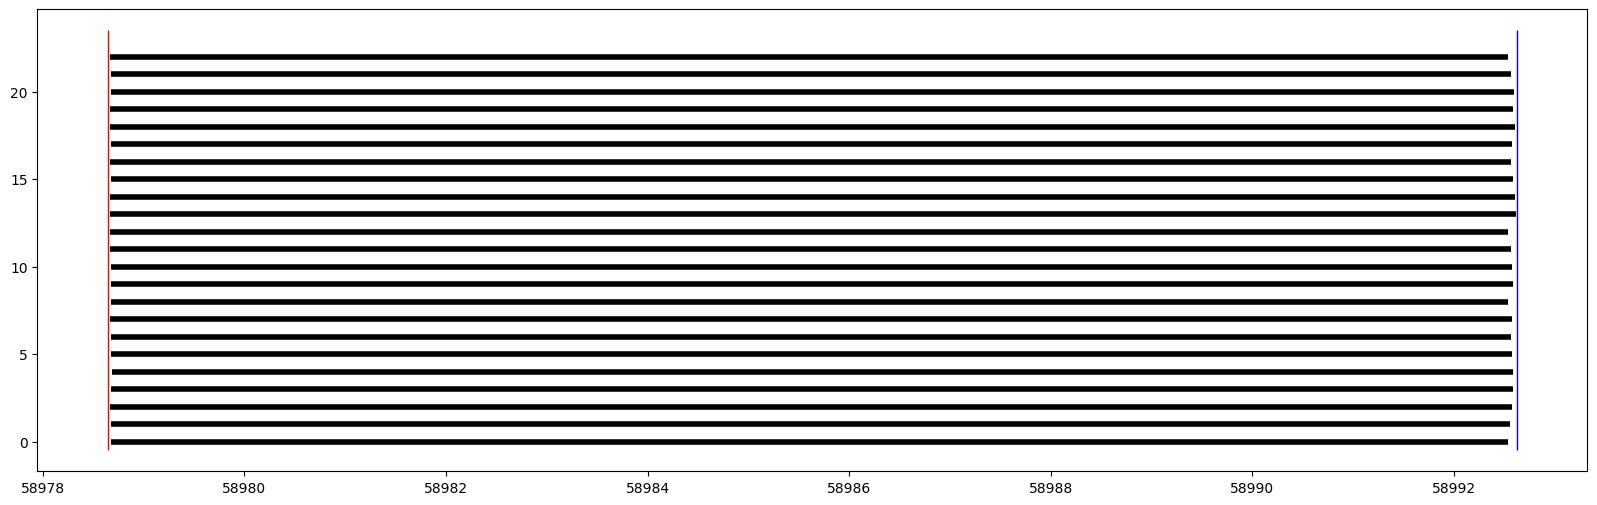

In [25]:
plot_timeline("eclipse", pauses=1, skip=2)

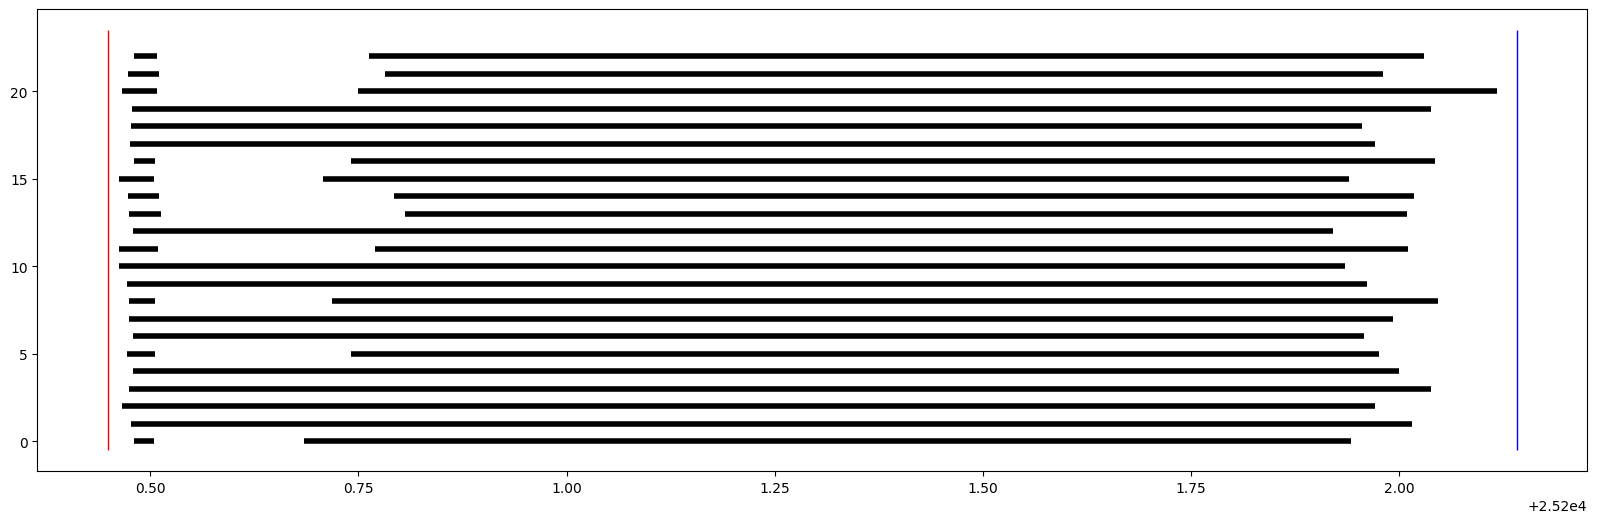

In [26]:
plot_timeline("graphchi", pauses=1, skip=2)

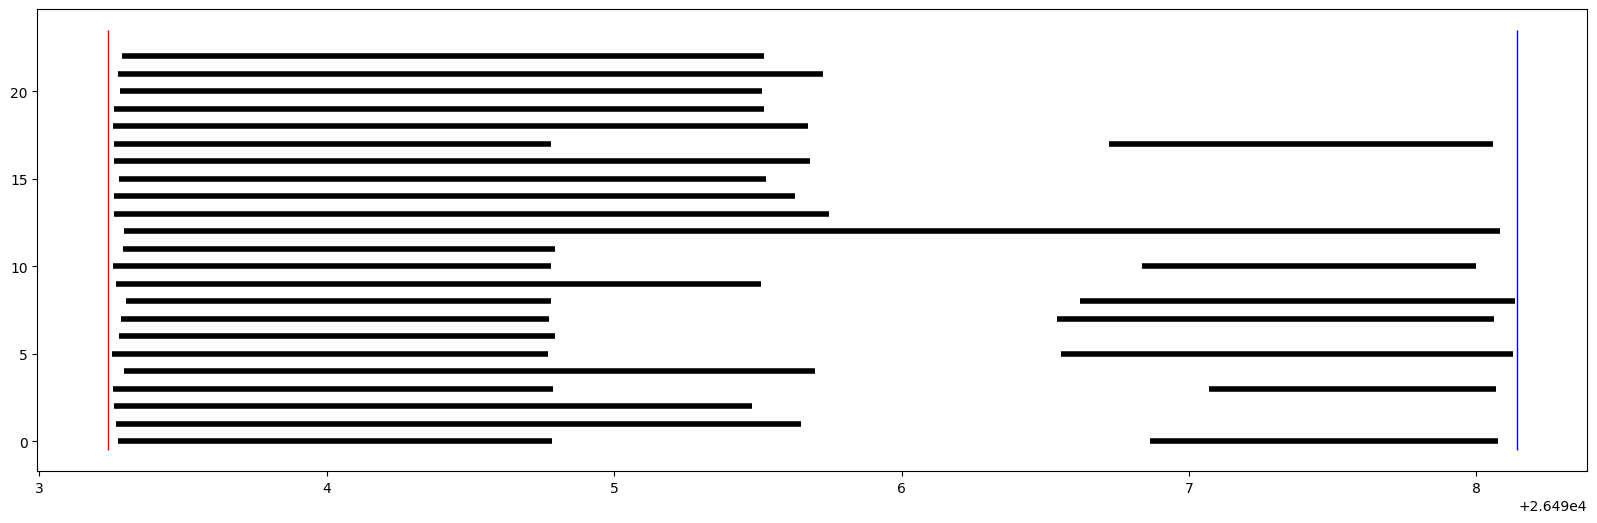

In [27]:
plot_timeline("h2o", pauses=1, skip=2)

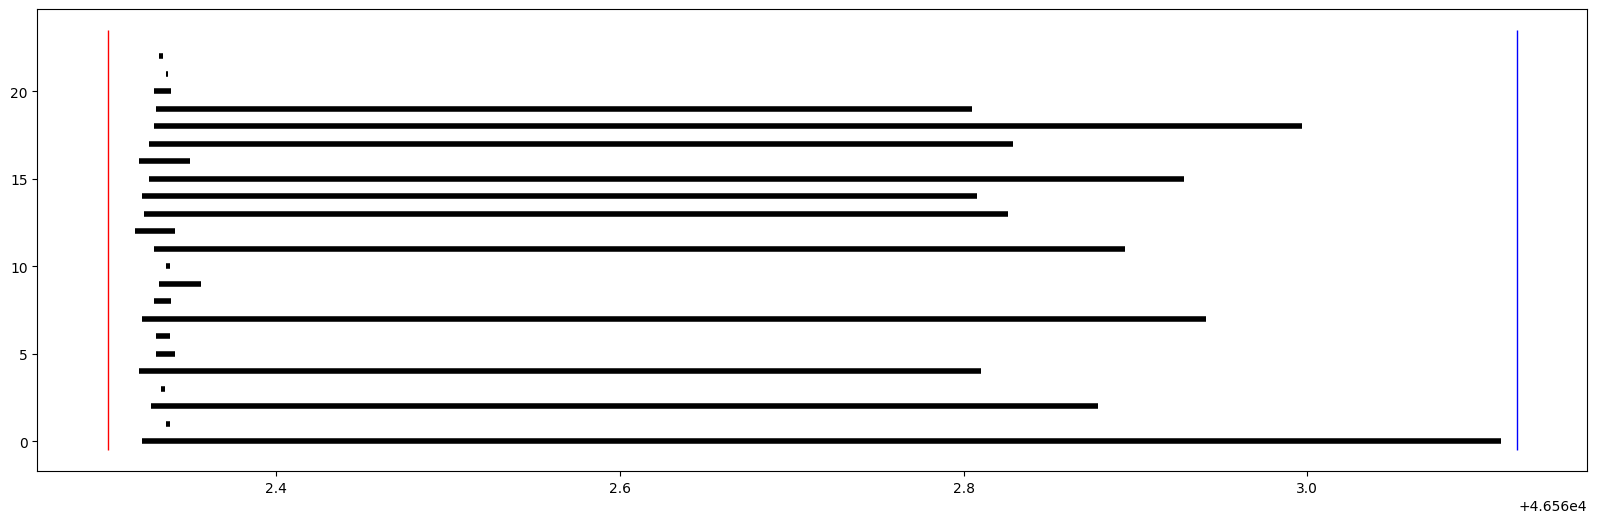

In [30]:
plot_timeline("luindex", pauses=1, skip=2)

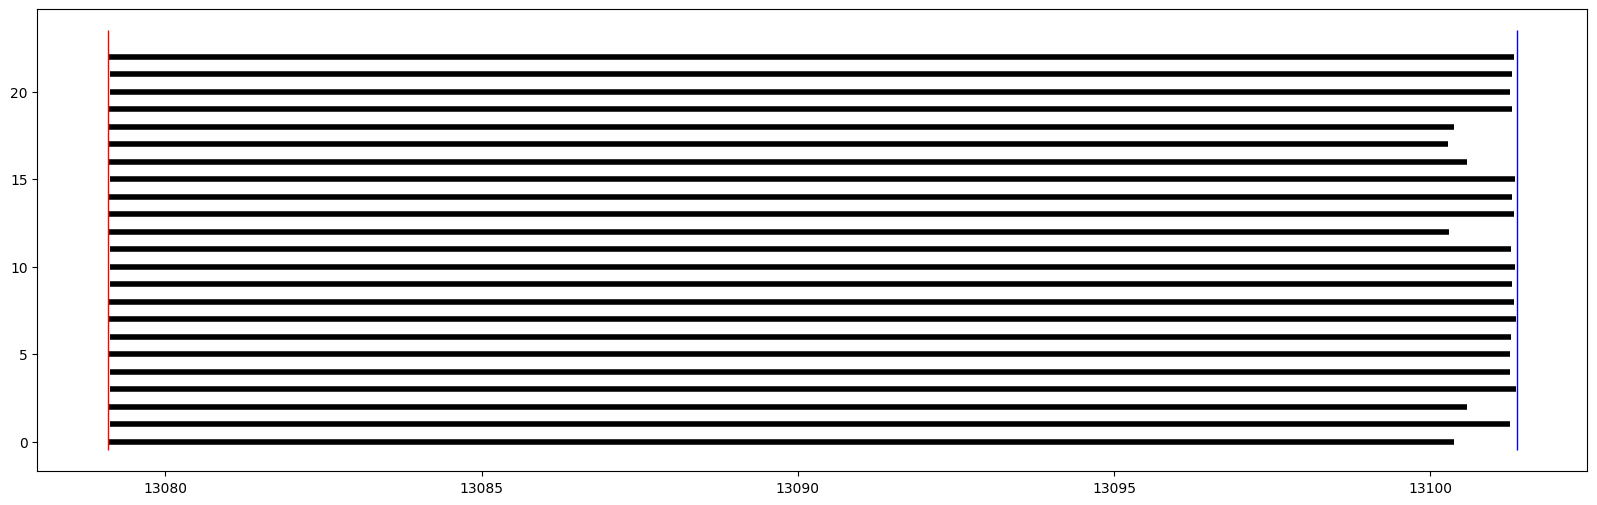

In [31]:
plot_timeline("pmd", pauses=1, skip=2)

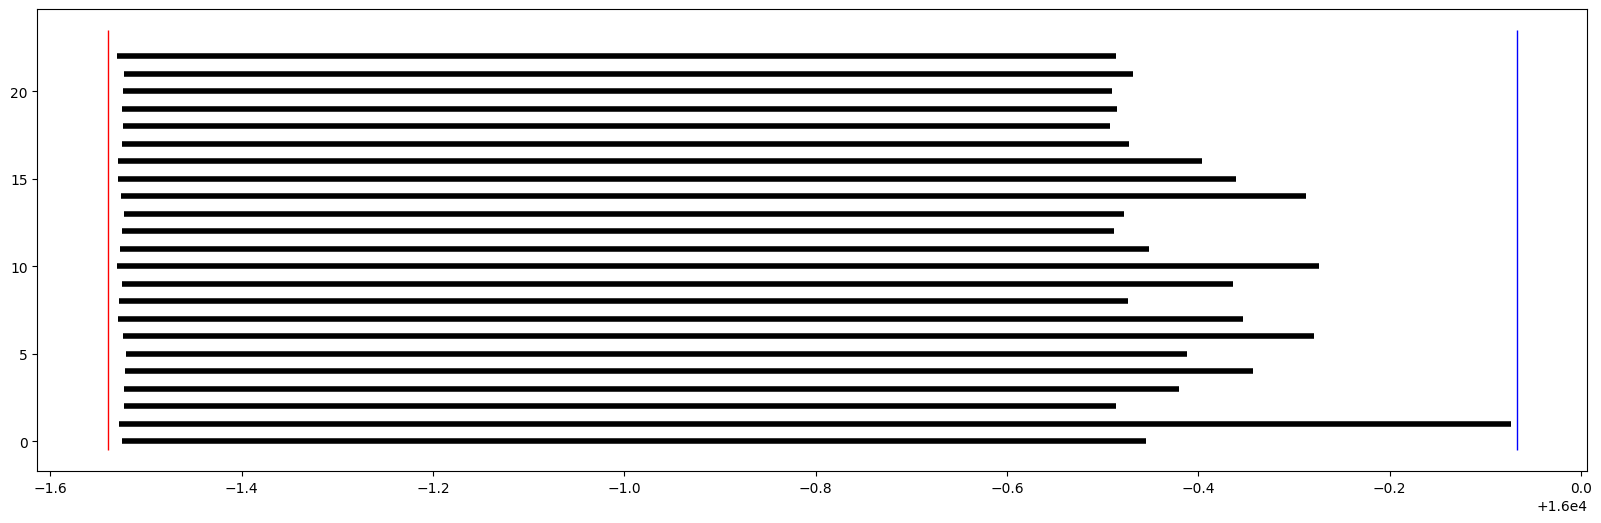

In [32]:
plot_timeline("sunflow", pauses=1, skip=2)

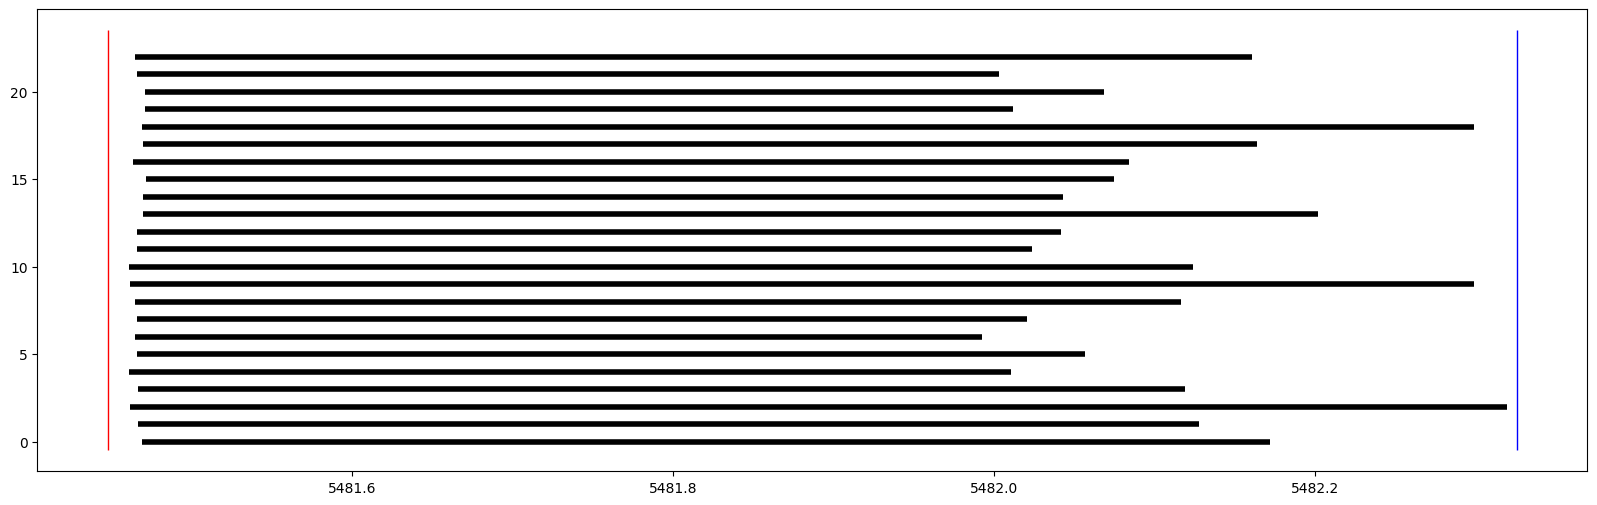

In [33]:
plot_timeline("xalan", pauses=1, skip=2)